In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [3]:
# Import the CSV
obesity_data = pd.read_csv("Data/RISKFACTORSANDACCESSTOCARE.csv")
obesity_data.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


In [7]:
# Create DF with only 'CHSI_State_Name', 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker'
sub_riskfactors_df = obesity_data[["CHSI_County_Name", 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker']]
sub_riskfactors_df.head()

,CHSI_County_Name,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
0,Autauga,27.8,78.6,24.5,26.6
1,Baldwin,27.2,76.2,23.6,24.6
2,Barbour,-1111.1,-1111.1,25.6,17.7
3,Bibb,-1111.1,86.6,-1111.1,-1111.1
4,Blount,33.5,74.6,24.2,23.6


In [8]:
sub_riskfactors_df2 = sub_riskfactors_df[(sub_riskfactors_df["Obesity"] > 0)& (sub_riskfactors_df["No_Exercise"] > 0) & (sub_riskfactors_df["Few_Fruit_Veg"] > 0)& (sub_riskfactors_df["Smoker"] > 0)]
sub_riskfactors_df2.head()

,CHSI_County_Name,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
0,Autauga,27.8,78.6,24.5,26.6
1,Baldwin,27.2,76.2,23.6,24.6
4,Blount,33.5,74.6,24.2,23.6
7,Calhoun,29.2,81.9,27.0,25.5
10,Chilton,30.3,82.8,31.2,30.0


In [ ]:
sub_riskfactors_df3 = [sub_riskfactors_df2["CHSI_County_Name"]]

In [11]:
#Group by State to identify count of obese counties by state
riskfactor_by_county = sub_riskfactors_df2.groupby("CHSI_County_Name").mean()
riskfactor_by_county.head()

,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
CHSI_County_Name,,,,
Abbeville,29.100,85.5,25.100,31.600
Acadia,38.900,87.9,27.800,26.100
Accomack,33.300,76.2,26.000,21.300
Ada,15.500,77.0,18.500,18.100
Adair,31.825,80.6,26.775,25.825


In [12]:
riskfactor_by_county_corr = sub_riskfactors_df2.groupby("CHSI_County_Name").corr()
riskfactor_by_county_corr.head(50)

No_Exercise  Few_Fruit_Veg   Obesity    Smoker
CHSI_County_Name                                                              
Abbeville        No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Acadia           No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Accomack         No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Ada              No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Adair            No_Exercise       1.000000      -0.197990  0.695555  0.957260
                 Few_Fruit_Veg    -0.197990       1.000000  0.301782 -0.292514
                 Obesity           0.695555       0.301782  1.000000  0.769999
                 Smoker            0.957260      -0.292514  0.769999  1.000000
Adams            No_Exercise       1.000000       0.195991  0.728447  0.062952
                 Few_Fruit_Veg     0.195991       1.000000  0.338726 -0.484798
                 Obesity           0.728447       0.338726  1.000000 -0.460486
                 Smoker            0.062952      -0.484798 -0.460486  1.000000
Addison          No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Aiken            No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Alachua          No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Alamance         No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Alameda          No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Alamosa          No_Exercise            NaN            NaN       NaN       NaN
                 Few_Fruit_Veg          NaN            NaN       NaN       NaN
                 Obesity                NaN            NaN       NaN       NaN
                 Smoker                 NaN            NaN       NaN       NaN
Albany           No_Exercise       1.000000      -1.000000  1.000000  1.000000
   

In [13]:
factors_county = riskfactor_by_county_corr[(riskfactor_by_county_corr["Obesity"] > 0.7)& (riskfactor_by_county_corr["No_Exercise"] > 0.7) & (riskfactor_by_county_corr["Few_Fruit_Veg"] > 0.7)& (riskfactor_by_county_corr["Smoker"] > 0.7)]
factors_county.head(50)

No_Exercise  Few_Fruit_Veg   Obesity    Smoker
CHSI_County_Name                                                              
Allen            No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Atchison         No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Baker            No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Beaufort         No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Bell             No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Berkeley         No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Blaine           No_Exercise       1.000000       0.962578  0.997273  0.897151
                 Few_Fruit_Veg     0.962578       1.000000  0.979953  0.983287
                 Obesity           0.997273       0.979953  1.000000  0.927304
                 Smoker            0.897151       0.983287  0.927304  1.000000
Bristol          No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Caddo            No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Chesterfield     No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Coffee           No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Coos             No_Exercise       1.000000       1.000000  1.000000  1.000000
                 Few_Fruit_Veg     1.000000       1.000000  1.000000  1.000000
                 Obesity           1.000000       1.000000  1.000000  1.000000
                 Smoker            1.000000       1.000000  1.000000  1.000000
Crittenden       No_Exercise       1.000000       1.000000  1.000000  1.000000
   

In [14]:
# Outliers
arr = sub_riskfactors_df2["Obesity"]

In [15]:
# Find median Obesity
mid = arr.median()
mid

24.4

In [16]:
# Use numpy to create quartiles
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr,75)

In [17]:
iqr = (q3 - q1)
print("interquartile range:", iqr)

interquartile range: 5.700000000000003


In [18]:
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)

In [19]:
arr[arr <= lower_boundary]

204      9.9
221     10.5
248     10.9
260     11.4
265     11.6
276      8.7
277     12.8
302      9.1
555      9.7
1611    11.5
1808    12.8
2796    10.2
3137     9.0
Name: Obesity, dtype: float64

In [20]:
arr[arr >= upper_boundary]

23      36.6
401     38.6
695     37.1
717     37.1
1045    35.8
1065    38.7
1303    35.9
1413    35.7
1445    38.6
1465    36.3
1474    35.7
1492    36.5
1933    36.9
2027    37.2
2318    40.2
2358    39.5
2374    38.3
2419    36.4
2425    36.0
2523    35.7
2939    37.4
3013    38.7
Name: Obesity, dtype: float64

In [31]:
lower_outliers = sub_riskfactors_df2.loc[[204,221,248,260,265,276,277,302, 555,1611,1808,2796,3137],["CHSI_County_Name", 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker']]
lower_outliers

,CHSI_County_Name,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
204,Marin,8.3,66.0,9.9,12.0
221,San Francisco,21.8,69.3,10.5,17.8
248,Boulder,10.3,69.3,10.9,14.3
260,Douglas,11.4,77.7,11.4,8.9
265,Garfield,8.7,70.2,11.6,20.1
276,La Plata,12.1,67.8,8.7,20.9
277,Larimer,13.6,75.8,12.8,20.7
302,Teller,16.9,76.6,9.1,20.7
555,Blaine,11.2,69.3,9.7,13.9
1611,Gallatin,13.5,77.3,11.5,14.9


In [32]:
# Sort it lowest to highest
lower_outliers_by_county_ascend = lower_outliers.sort_values(['Obesity'], ascending=True)
lower_outliers_by_county_ascend

,CHSI_County_Name,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
276,La Plata,12.1,67.8,8.7,20.9
3137,Teton,9.6,68.8,9.0,13.7
302,Teller,16.9,76.6,9.1,20.7
555,Blaine,11.2,69.3,9.7,13.9
204,Marin,8.3,66.0,9.9,12.0
2796,Summit,12.9,73.9,10.2,8.7
221,San Francisco,21.8,69.3,10.5,17.8
248,Boulder,10.3,69.3,10.9,14.3
260,Douglas,11.4,77.7,11.4,8.9
1611,Gallatin,13.5,77.3,11.5,14.9


In [24]:
higher_outliers = sub_riskfactors_df2.loc[[23,401,695,717,1045,1065,1303,1413,1445,1465,1474,1492,1933,2027,2318,2358,
                                           2374,2419,2425,2523,2939,3013],["CHSI_County_Name", 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker']]
higher_outliers

,CHSI_County_Name,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
23,Dallas,31.5,85.9,36.6,20.4
401,Burke,40.8,77.3,38.6,21.4
695,Adams,31.7,82.8,37.1,15.4
717,Fountain,35.5,82.0,37.1,24.6
1045,Jackson,43.9,87.6,35.8,41.6
1065,McLean,41.0,83.1,38.7,27.6
1303,St. Joseph,26.6,77.8,35.9,27.5
1413,Copiah,36.7,78.4,35.7,27.1
1445,Marshall,31.3,80.6,38.6,31.2
1465,Sunflower,35.1,84.8,36.3,25.2


In [33]:
# Sort it highest to lowest
higher_outliers_by_county_descend = higher_outliers.sort_values(['Obesity'], ascending=False)
higher_outliers_by_county_descend

,CHSI_County_Name,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
2318,Bamberg,31.6,82.1,40.2,23.8
2358,Williamsburg,28.9,73.6,39.5,24.0
3013,Logan,34.3,82.9,38.7,31.9
1065,McLean,41.0,83.1,38.7,27.6
1445,Marshall,31.3,80.6,38.6,31.2
401,Burke,40.8,77.3,38.6,21.4
2374,Corson,34.2,82.4,38.3,28.5
2939,Petersburg City,31.8,80.2,37.4,26.0
2027,Rolette,29.3,81.0,37.2,35.6
695,Adams,31.7,82.8,37.1,15.4


<IPython.core.display.Javascript object>


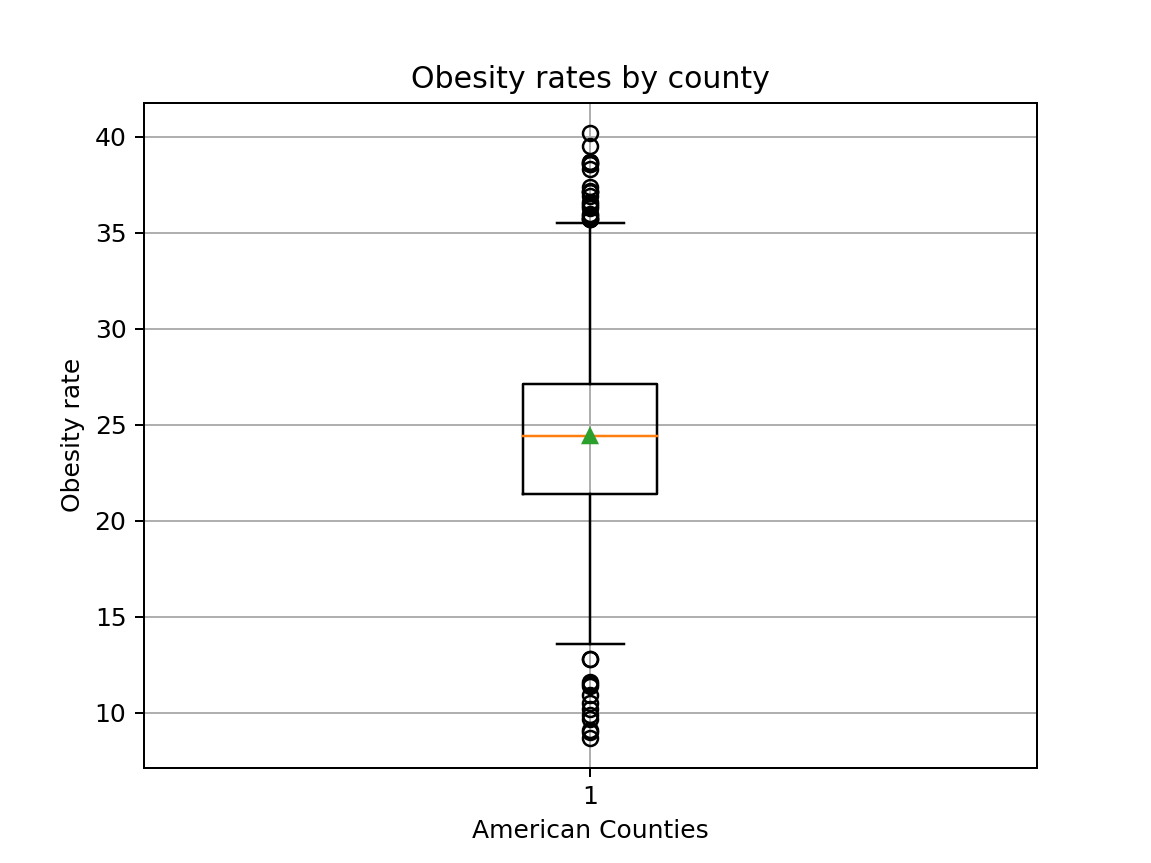

Text(0, 0.5, 'Obesity rate')

In [29]:
# Create box plot
plt.boxplot(arr, showmeans=True)
plt.grid()
plt.show()
plt.title("Obesity rates by county")
plt.xlabel("American Counties")
plt.ylabel("Obesity rate")

In [30]:
plt.savefig('obesityrates_by_counties.png')

In [36]:
lower_outliers.corr()

,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
No_Exercise,1.000000,0.296457,-0.022000,0.316354
Few_Fruit_Veg,0.296457,1.000000,0.235964,0.035149
Obesity,-0.022000,0.235964,1.000000,-0.117741
Smoker,0.316354,0.035149,-0.117741,1.000000


In [37]:
higher_outliers.corr()

,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
No_Exercise,1.000000,0.331872,-0.159223,0.044538
Few_Fruit_Veg,0.331872,1.000000,-0.246312,0.003607
Obesity,-0.159223,-0.246312,1.000000,-0.236041
Smoker,0.044538,0.003607,-0.236041,1.000000
